In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [62]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [63]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [14]:
# Find the most recent date in the data set.
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
x=str(latest_date[0])
print(x)

2017-08-23


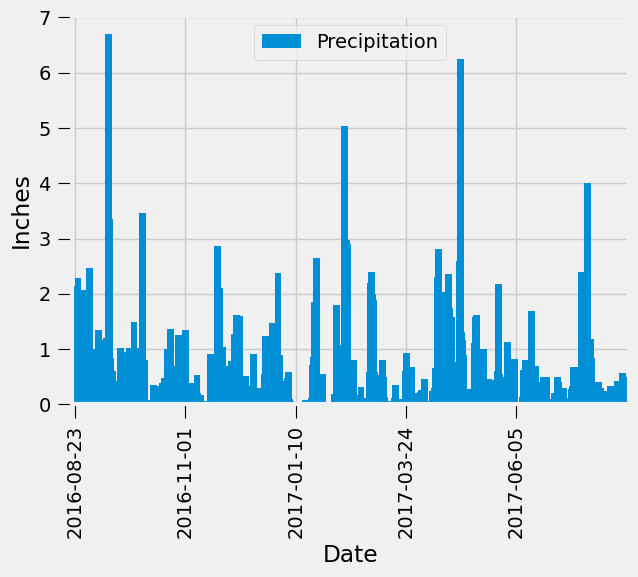

In [95]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date=dt.datetime.strptime(x,'%Y-%m-%d').date() - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_last_12=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_last_12_DF=pd.DataFrame(prcp_last_12, columns=['Date','Precipitation'])

# Sort the dataframe by date
prcp_last_12_DF=prcp_last_12_DF.dropna().sort_values(by=['Date'])       # Remove the rows with missing values
# prcp_last_12_DF=prcp_last_12_DF.sort_values(by=['Date'])


# Use Pandas Plotting with Matplotlib to plot the data
ax=prcp_last_12_DF.plot(kind='bar', x='Date', width=25)
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
plt.locator_params(axis='x', nbins=5) 
ax.tick_params(pad=5, length=10, bottom=True,left=True)


Text(0, 0.5, 'Inches')

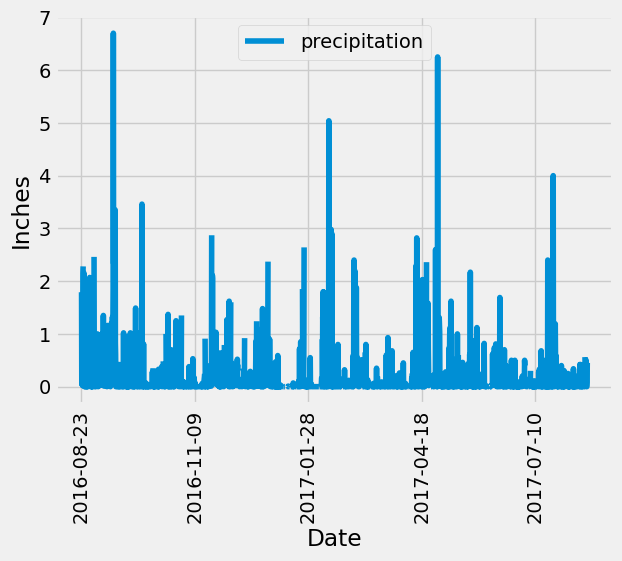

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.     *** TO BE REMOVED ***
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [17]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_last_12_DF.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
session.query(Station.name).count()   #    *** TO BE REMOVED ***

9

In [19]:
# Design a query to calculate the total number of stations in the dataset
stations=session.query(Measurement.station).group_by(Measurement.station).count()
stations

9

In [12]:
# Design a query to calculate the total number of stations in the dataset   *** TO BE REMOVED ***


[(9,)]

In [22]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_station=session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc())
for row in active_station:
    print(row)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)   *** TO BE REMOVED ***
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station_temp=session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).where(Measurement.station==active_station[0][0]).all()
print(active_station_temp)


[(54.0, 85.0, 71.66378066378067)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.   *** TO BE REMOVED ***


[(54.0, 85.0, 71.66378066378067)]

<Axes: xlabel='Temperature', ylabel='Frequency'>

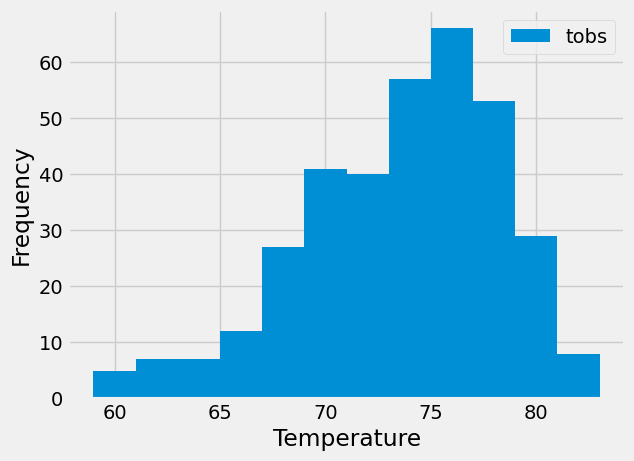

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_last_12_most_active=session.query(Measurement.tobs).filter(Measurement.date >= start_date).filter(Measurement.station==active_station[0][0]).all()
tobs_last_12_most_active_DF=pd.DataFrame(tobs_last_12_most_active)
tobs_last_12_most_active_DF.plot.hist(bins=12, xlabel='Temperature')

Text(0.5, 4.183333333333314, 'Temperature')

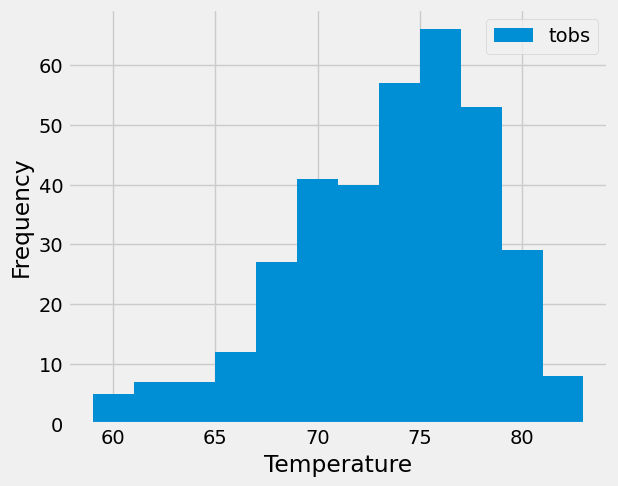

In [15]:
# Using the most active station id    *** TO BE REMOVED ***
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [41]:
# Close Session
session.close()